**Dengan ini, saya yang bernama Jovan Samuel Hendra dengan NIM 2602167832, dengan sungguh-sungguh berjanji bahwa file yang saya submit adalah hasil karya saya sendiri dan bukan merupakan salinan dari pekerjaan teman saya.**

# a)

1a. the machine learning model that is best suited for classifying characteristic in this case is going to be the clustering model

# b) c)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Global_Education_Dataset_UAS.csv")

In [3]:
df

,Countries and areas,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
0,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,44,...,13,11,0,0,74,56,32.49,very high,extremely low,moderately low
1,Albania,41.153332,20.168331,4,2,6,3,6,1,21,...,0,0,48,58,99,100,11.78,very high,moderately low,moderate
2,Algeria,28.033886,1.659626,0,0,0,0,0,0,0,...,0,0,21,19,98,97,24.28,very high,moderately low,moderately low
3,Andorra,42.506285,1.521801,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7.20,very high,extremely low,extremely low
4,Angola,11.202692,17.873887,31,39,0,0,0,0,0,...,0,0,0,0,0,0,40.73,very high,extremely low,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Venezuela,6.423750,66.589730,14,14,10,10,15,13,28,...,0,0,0,0,0,0,17.88,high,moderately high,low
198,Vietnam,14.058324,108.277199,0,0,0,0,0,0,0,...,55,51,86,81,98,98,16.75,very high,low,extremely low
199,Yemen,15.552727,48.516388,96,96,10,21,23,34,46,...,0,0,0,0,0,0,30.45,high,extremely low,moderate
200,Zambia,13.133897,27.849332,0,0,17,13,0,0,0,...,0,0,5,2,93,92,36.19,high,extremely low,moderately low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Countries and areas                      202 non-null    object 
 1   Latitude                                 202 non-null    float64
 2   Longitude                                202 non-null    float64
 3   OOSR_Pre0Primary_Age_Male                202 non-null    int64  
 4   OOSR_Pre0Primary_Age_Female              202 non-null    int64  
 5   OOSR_Primary_Age_Male                    202 non-null    int64  
 6   OOSR_Primary_Age_Female                  202 non-null    int64  
 7   OOSR_Lower_Secondary_Age_Male            202 non-null    int64  
 8   OOSR_Lower_Secondary_Age_Female          202 non-null    int64  
 9   OOSR_Upper_Secondary_Age_Male            202 non-null    int64  
 10  OOSR_Upper_Secondary_Age_Female          202 non-n

In [5]:
df = df.drop(['Countries and areas'],axis=1)

In [6]:
categorical = [col for col in df.columns if df[col].dtypes == 'O']
categorical

['Completion_Rate_Primary_Male',
 'Completion_Rate_Primary_Female',
 'Completion_Rate_Lower_Secondary_Male',
 'Completion_Rate_Lower_Secondary_Female',
 'Completion_Rate_Upper_Secondary_Male',
 'Completion_Rate_Upper_Secondary_Female',
 'Gross_Primary_Education_Enrollment',
 'Gross_Tertiary_Education_Enrollment',
 'Unemployment_Rate']

In [7]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()
df['Completion_Rate_Primary_Male']=label_encoding.fit_transform(df['Completion_Rate_Primary_Male'])
df['Completion_Rate_Primary_Female']=label_encoding.fit_transform(df['Completion_Rate_Primary_Female'])
df['Completion_Rate_Lower_Secondary_Male']=label_encoding.fit_transform(df['Completion_Rate_Lower_Secondary_Male'])
df['Completion_Rate_Lower_Secondary_Female']=label_encoding.fit_transform(df['Completion_Rate_Lower_Secondary_Female'])
df['Completion_Rate_Upper_Secondary_Male']=label_encoding.fit_transform(df['Completion_Rate_Upper_Secondary_Male'])
df['Completion_Rate_Upper_Secondary_Female']=label_encoding.fit_transform(df['Completion_Rate_Upper_Secondary_Female'])
df['Gross_Primary_Education_Enrollment']=label_encoding.fit_transform(df['Gross_Primary_Education_Enrollment'])
df['Gross_Tertiary_Education_Enrollment']=label_encoding.fit_transform(df['Gross_Tertiary_Education_Enrollment'])
df['Unemployment_Rate']=label_encoding.fit_transform(df['Unemployment_Rate'])

In [8]:
df

,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
0,33.939110,67.709953,0,0,0,0,0,0,44,69,...,13,11,0,0,74,56,32.49,6,1,5
1,41.153332,20.168331,4,2,6,3,6,1,21,15,...,0,0,48,58,99,100,11.78,6,6,3
2,28.033886,1.659626,0,0,0,0,0,0,0,0,...,0,0,21,19,98,97,24.28,6,6,5
3,42.506285,1.521801,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7.20,6,1,0
4,11.202692,17.873887,31,39,0,0,0,0,0,0,...,0,0,0,0,0,0,40.73,6,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,6.423750,66.589730,14,14,10,10,15,13,28,19,...,0,0,0,0,0,0,17.88,2,5,2
198,14.058324,108.277199,0,0,0,0,0,0,0,0,...,55,51,86,81,98,98,16.75,6,3,0
199,15.552727,48.516388,96,96,10,21,23,34,46,68,...,0,0,0,0,0,0,30.45,2,1,3
200,13.133897,27.849332,0,0,17,13,0,0,0,0,...,0,0,5,2,93,92,36.19,2,1,5


In [9]:
df_clustering_inputlist= df.drop(['Unemployment_Rate'], axis=1)
df_clustering_inputlist.head()

,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,...,Grade_2_3_Proficiency_Math,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment
0,33.939110,67.709953,0,0,0,0,0,0,44,69,...,25,13,11,0,0,74,56,32.49,6,1
1,41.153332,20.168331,4,2,6,3,6,1,21,15,...,0,0,0,48,58,99,100,11.78,6,6
2,28.033886,1.659626,0,0,0,0,0,0,0,0,...,0,0,0,21,19,98,97,24.28,6,6
3,42.506285,1.521801,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7.20,6,1
4,11.202692,17.873887,31,39,0,0,0,0,0,0,...,0,0,0,0,0,0,0,40.73,6,1


# KMEANS CLUSTERING

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import axes3d

In [11]:
# Assuming df_input is your DataFrame containing the input data
best_n_clusters = None
best_silhouette_score = -1 # Initialize with a low value

K = range (2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=0)
    cluster_labels = kmeanModel.fit_predict(df_clustering_inputlist)

    # Calculate silhouette_score for each cluster
    silhouette_avg = silhouette_score(df_clustering_inputlist,cluster_labels)

    print("For n_clusters =", k, "The average silhouette_score is:", silhouette_avg)

    # Save the best result
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_n_clusters = k
        
# Print the best result
print("The best number of clusters is:", best_n_clusters, "with silhouette score:", best_silhouette_score)
kmeans_sihlouette_score = best_silhouette_score

For n_clusters = 2 The average silhouette_score is: 0.2821149029406953
For n_clusters = 3 The average silhouette_score is: 0.2760096750266069
For n_clusters = 4 The average silhouette_score is: 0.2815180352538375
For n_clusters = 5 The average silhouette_score is: 0.27911224118025313
For n_clusters = 6 The average silhouette_score is: 0.2598567409462513
For n_clusters = 7 The average silhouette_score is: 0.2840950935312262
For n_clusters = 8 The average silhouette_score is: 0.2730258107781184
For n_clusters = 9 The average silhouette_score is: 0.2810362215885444
The best number of clusters is: 7 with silhouette score: 0.2840950935312262


In [12]:
kmeanModel = KMeans(n_clusters=best_n_clusters,random_state=0)
df['KMeans'] = kmeanModel.fit_predict(df_clustering_inputlist)

In [13]:
df

,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,...,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate,KMeans
0,33.939110,67.709953,0,0,0,0,0,0,44,69,...,11,0,0,74,56,32.49,6,1,5,2
1,41.153332,20.168331,4,2,6,3,6,1,21,15,...,0,48,58,99,100,11.78,6,6,3,2
2,28.033886,1.659626,0,0,0,0,0,0,0,0,...,0,21,19,98,97,24.28,6,6,5,2
3,42.506285,1.521801,0,0,0,0,0,0,0,0,...,0,0,0,0,0,7.20,6,1,0,6
4,11.202692,17.873887,31,39,0,0,0,0,0,0,...,0,0,0,0,0,40.73,6,1,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,6.423750,66.589730,14,14,10,10,15,13,28,19,...,0,0,0,0,0,17.88,2,5,2,6
198,14.058324,108.277199,0,0,0,0,0,0,0,0,...,51,86,81,98,98,16.75,6,3,0,5
199,15.552727,48.516388,96,96,10,21,23,34,46,68,...,0,0,0,0,0,30.45,2,1,3,0
200,13.133897,27.849332,0,0,17,13,0,0,0,0,...,0,5,2,93,92,36.19,2,1,5,2


In [14]:
df_clustering_inputlist

,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,...,Grade_2_3_Proficiency_Math,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment
0,33.939110,67.709953,0,0,0,0,0,0,44,69,...,25,13,11,0,0,74,56,32.49,6,1
1,41.153332,20.168331,4,2,6,3,6,1,21,15,...,0,0,0,48,58,99,100,11.78,6,6
2,28.033886,1.659626,0,0,0,0,0,0,0,0,...,0,0,0,21,19,98,97,24.28,6,6
3,42.506285,1.521801,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7.20,6,1
4,11.202692,17.873887,31,39,0,0,0,0,0,0,...,0,0,0,0,0,0,0,40.73,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,6.423750,66.589730,14,14,10,10,15,13,28,19,...,0,0,0,0,0,0,0,17.88,2,5
198,14.058324,108.277199,0,0,0,0,0,0,0,0,...,0,55,51,86,81,98,98,16.75,6,3
199,15.552727,48.516388,96,96,10,21,23,34,46,68,...,0,0,0,0,0,0,0,30.45,2,1
200,13.133897,27.849332,0,0,17,13,0,0,0,0,...,0,0,0,5,2,93,92,36.19,2,1


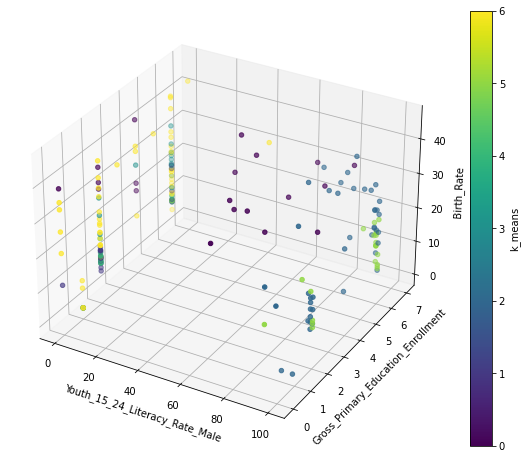

In [15]:
# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with colors based on 'k_means' column
scatter = ax.scatter(df_clustering_inputlist['Youth_15_24_Literacy_Rate_Male'], df_clustering_inputlist['Gross_Primary_Education_Enrollment'], df_clustering_inputlist['Birth_Rate'], c=df['KMeans'], cmap='viridis')

# Add color bar
color_bar = fig.colorbar(scatter, ax=ax)
color_bar.set_label('k_means')

# Set axis labels
ax.set_xlabel('Youth_15_24_Literacy_Rate_Male')
ax.set_ylabel('Gross_Primary_Education_Enrollment')
ax.set_zlabel('Birth_Rate')

# Show the plot
plt.show()

In [16]:
import plotly.express as px

fig = px.scatter_3d(df, x='Youth_15_24_Literacy_Rate_Male', y='Gross_Primary_Education_Enrollment', z='Birth_Rate',
              color='KMeans')
fig.show()

# DBSCAN

In [17]:
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import DBSCAN

In [18]:
# Parameter grid untuk dicari
param_grid = {
    'eps': np.arange(1, 20, 1),         # Sesuaikan rentang sesuai kebutuhan
    'min_samples': np.arange(2, 20, 1)  # Sesuaikan rentang sesuai kebutuhan
}

best_score = -1
best_params = None

# Melakukan Grid Search
for params in ParameterGrid(param_grid):
    dbscan_model = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
    labels = dbscan_model.fit_predict(df_clustering_inputlist)

    # Hanya hitung Silhouette Score jika terdapat lebih dari satu label
    unique_labels = np.unique(labels)

    if len(unique_labels) > 2:
        # Silhouette Score sebagai metrik evaluasi
        score = silhouette_score(df_clustering_inputlist,labels)

        # Memperbarui parameter terbaik jika mendapatkan skor yang lebih baik
        if score > best_score:
            best_score = score
            best_params = params

print("Parameter Terbaik:")
print("eps:", best_params['eps'])
print("min_samples:", best_params['min_samples'])
print("Silhouette Score:", best_score)
DBSCAN_sihlouette_score = best_score

Parameter Terbaik:
eps: 11
min_samples: 3
Silhouette Score: -0.1493720773245242


In [19]:
dbscan_model = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])  # Sesuaikan nilai eps dan min_samples sesuai kebutuhan
df['DBSCAN'] = dbscan_model.fit_predict(df_clustering_inputlist)

In [20]:
unique_value_count = df['DBSCAN'].nunique()
print("Number of unique values in 'DBSCAN' column:", unique_value_count)

Number of unique values in 'DBSCAN' column: 3


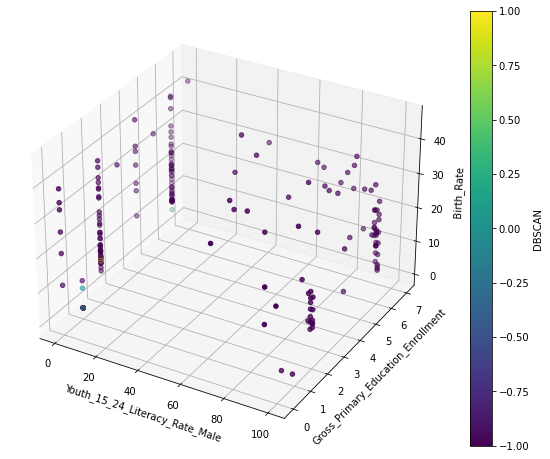

In [21]:
# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with colors based on 'k_means' column
scatter = ax.scatter(df_clustering_inputlist['Youth_15_24_Literacy_Rate_Male'], df_clustering_inputlist['Gross_Primary_Education_Enrollment'], df_clustering_inputlist['Birth_Rate'], c=df['DBSCAN'], cmap='viridis')


# Add color bar
color_bar = fig.colorbar(scatter, ax=ax)
color_bar.set_label('DBSCAN')

# Set axis labels
ax.set_xlabel('Youth_15_24_Literacy_Rate_Male')
ax.set_ylabel('Gross_Primary_Education_Enrollment')
ax.set_zlabel('Birth_Rate')

# Show the plot
plt.show()

In [22]:
fig = px.scatter_3d(df, x='Youth_15_24_Literacy_Rate_Male', y='Gross_Primary_Education_Enrollment', z='Birth_Rate',
              color='DBSCAN')
fig.show()

# Hierarchical 

In [23]:
from sklearn.cluster import AgglomerativeClustering

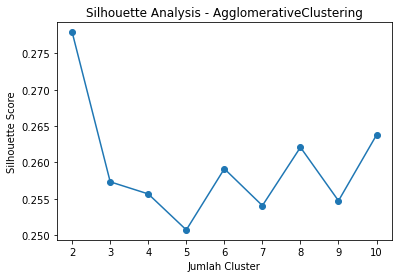

Jumlah Cluster Terbaik (Silhouette): 2 with a silhouette score of 0.27791813960740464


In [24]:
# Silhouette Analysis: Menghitung skor silhouette untuk jumlah klaster yang berbeda
silhouette_scores = []
for n_clusters in range(2, 11):
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = agglomerative.fit_predict(df_clustering_inputlist)
    silhouette_avg = silhouette_score(df_clustering_inputlist, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Menampilkan plot silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis - AgglomerativeClustering')
plt.show()

# Menemukan jumlah cluster terbaik berdasarkan skor silhouette
best_cluster_index = np.argmax(silhouette_scores)
best_cluster_count = best_cluster_index + 2  # Karena iterasi dimulai dari 2

print(f"Jumlah Cluster Terbaik (Silhouette): {best_cluster_count} with a silhouette score of {np.max(silhouette_scores)}" )
Hierarchical_sihlouette_score = np.max(silhouette_scores)

In [25]:
# Melakukan hierarchical clustering dengan AgglomerativeClustering
agglomerative_model = AgglomerativeClustering(n_clusters=best_n_clusters)  # Sesuaikan parameter sesuai kebutuhan
df['Hierarchical'] = agglomerative_model.fit_predict(df_clustering_inputlist)

In [26]:
df

,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,...,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate,KMeans,DBSCAN,Hierarchical
0,33.939110,67.709953,0,0,0,0,0,0,44,69,...,0,74,56,32.49,6,1,5,2,-1,0
1,41.153332,20.168331,4,2,6,3,6,1,21,15,...,58,99,100,11.78,6,6,3,2,-1,1
2,28.033886,1.659626,0,0,0,0,0,0,0,0,...,19,98,97,24.28,6,6,5,2,-1,1
3,42.506285,1.521801,0,0,0,0,0,0,0,0,...,0,0,0,7.20,6,1,0,6,0,0
4,11.202692,17.873887,31,39,0,0,0,0,0,0,...,0,0,0,40.73,6,1,2,6,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,6.423750,66.589730,14,14,10,10,15,13,28,19,...,0,0,0,17.88,2,5,2,6,-1,0
198,14.058324,108.277199,0,0,0,0,0,0,0,0,...,81,98,98,16.75,6,3,0,5,-1,3
199,15.552727,48.516388,96,96,10,21,23,34,46,68,...,0,0,0,30.45,2,1,3,0,-1,0
200,13.133897,27.849332,0,0,17,13,0,0,0,0,...,2,93,92,36.19,2,1,5,2,-1,1


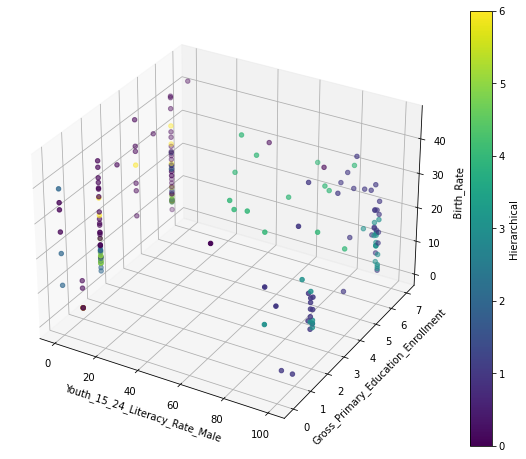

In [27]:
# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with colors based on 'k_means' column
scatter = ax.scatter(df_clustering_inputlist['Youth_15_24_Literacy_Rate_Male'], df_clustering_inputlist['Gross_Primary_Education_Enrollment'], df_clustering_inputlist['Birth_Rate'], c=df['Hierarchical'], cmap='viridis')

# Add color bar
color_bar = fig.colorbar(scatter, ax=ax)
color_bar.set_label('Hierarchical')

# Set axis labels
ax.set_xlabel('Youth_15_24_Literacy_Rate_Male')
ax.set_ylabel('Gross_Primary_Education_Enrollment')
ax.set_zlabel('Birth_Rate')

# Show the plot
plt.show()

# D)

In [28]:
Model = ['KMeans','DBSCAN','Hierarchical']

model_silhouette_score = [kmeans_sihlouette_score,DBSCAN_sihlouette_score,Hierarchical_sihlouette_score]

In [29]:
classification_df = pd.DataFrame({"Model":Model,"Model Silhouette Score":model_silhouette_score}).T

classification_df

,0,1,2
Model,KMeans,DBSCAN,Hierarchical
Model Silhouette Score,0.284095,-0.149372,0.277918


**Based on the 3 models, the best performing model for this dataset is the KMeans Clustering with a silhouette score of 0.284095 and the worst performing model is DBSCAN with a silhouette score of -0.149372**